# Seaborn Lecture Note $-$ Part 4
___

See [seaborn homepage](https://seaborn.pydata.org/introduction.html) for more detailed information and [documentation](https://seaborn.pydata.org/api.html), or visit their [Github page here](https://github.com/mwaskom/seaborn).
<br><br>
Tutorial page for seaborn:
https://seaborn.pydata.org/tutorial.html
___

This part covers **Grids** in Seaborn.
<br><br>
Learn how to use seaborn grid's ability to automate subplots based off of features in our data.
___

In [1]:
import seaborn as sns
%matplotlib inline

Let's load the most famous sample dataset, *iris* :

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Plot using `sns.pairplot()` :

(see [part 1: Distribution Plots](./05-seaborn-note-1.ipynb))

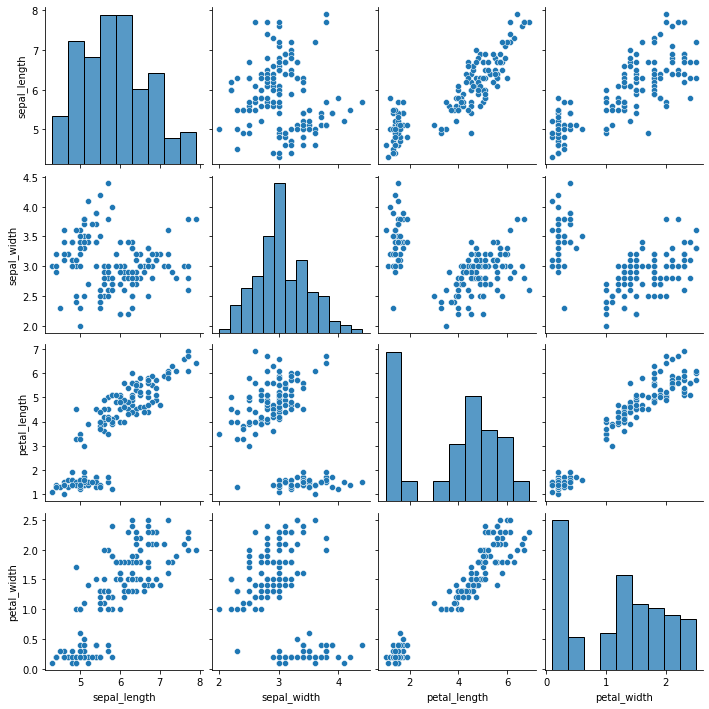

In [4]:
sns.pairplot(iris)

___
## 4. Grids

Seaborn pair grid mechanism enables us to customize the likes of pairplot above with a lot more control over the actual plots.

Let's start with `sns.PairGrid(dataframe)` which will give us an empty pairgrid. `PairGrid()` requires us to do a little more than `pairplot()`, but gives us a lot more control.

### 4.1. `PairGrid()`

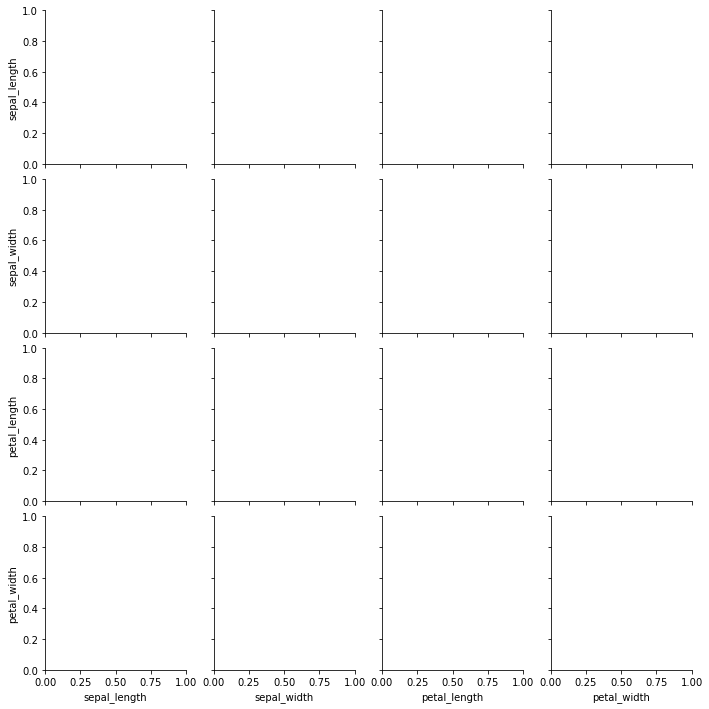

In [5]:
sns.PairGrid(iris)

It takes all the numerical columns and grids them up, i.e. making the subplots for us. That being said, a `pairplot()` is just a simplified version of this `PairGrid()` since seaborn will take care of everything from you automatically in pairplot but not in PairGrid.

Now let's try how can we use `PairGrid()` *properly*.

In [7]:
import matplotlib.pyplot as plt

#### Use `map(plot_type, *args, **kwargs)`

For example, we can use scatter plot from matplotlib :

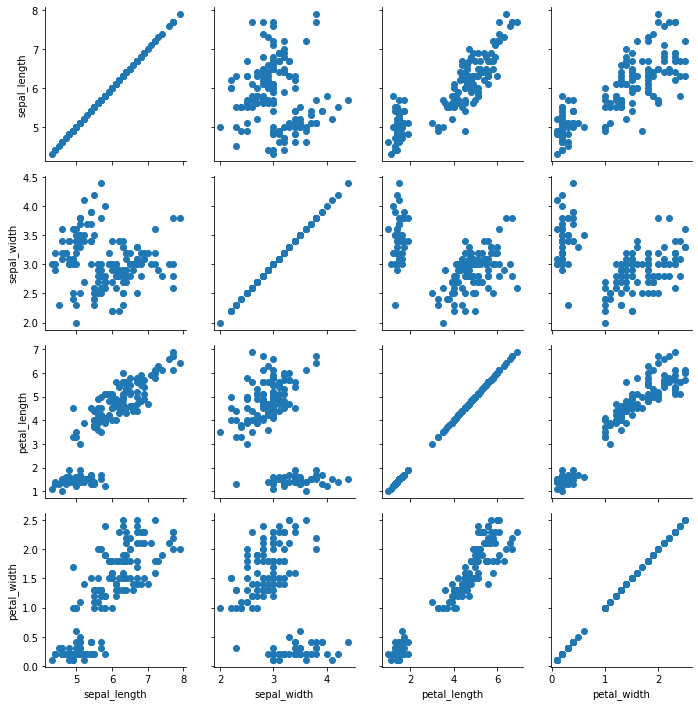

In [11]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

If, for example, we want to specify what are on the diagonal upper half and lower half, we can use `map_diag(plot_type)` command:

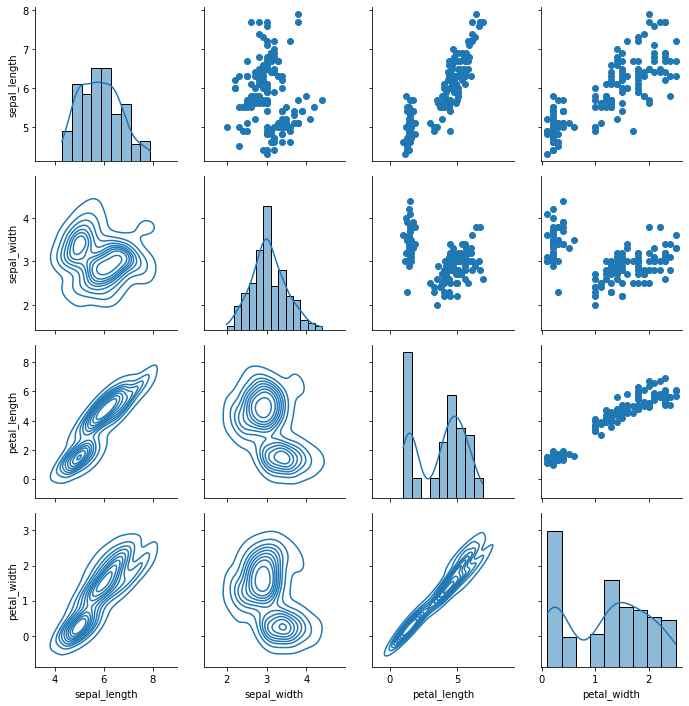

In [17]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot,kde=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

Now we know the concept of how `PairGrid()` lets us to take the full control over the plots.

In most case, we'll just use `pairplot()` since it's simpler and gives us most information we want in an instant. But if we ever want to get a little more customized plots in a pair-plot type, we can use `PairGrid()` to do that.

### 4.2. Facet Grid

`sns.FacetGrid()`

Let's call **tips** dataset sample again,

In [18]:
tips = sns.load_dataset('tips')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Now let's try the FacetGrid. Don't forget to use `map()` after that!

Syntax:

`sns.FacetGrid(data=dataframe,col=col_name,row=row_name)`

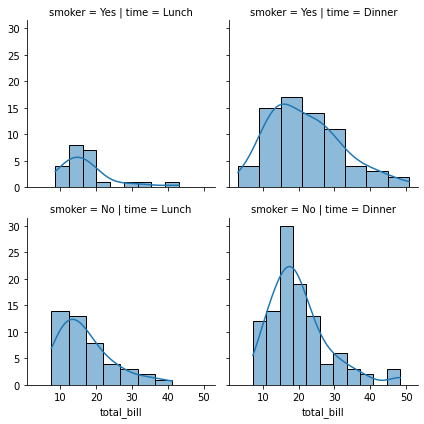

In [22]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.histplot,'total_bill',kde=True)

So what's going on here?

We `map()` a plot type `sns.histplot` and separate the results based on the certain names of column `col` and row `row`.

`FacetGrid()` do the labeling for us. In the example above, the x-axis represents the total bill within four separated plots. You can check each of the plot title and see what makes sense of it.

- First row is for smoker = Yes. Second row is for smoker = No
- First column is for time = lunch. Second column is for time = dinner

**NOTE:**<br>
You should use a plot type that can handle the number of variable argument(s)! In the example above, if you're trying to map a plot type that needs more than one argument, e.g. `plt.scatter`, without passing the required arguments, it will generate an error message.

If, for example, we need to use scatter plot in FacetGrid, all we need to do is just pass the second argument for it:

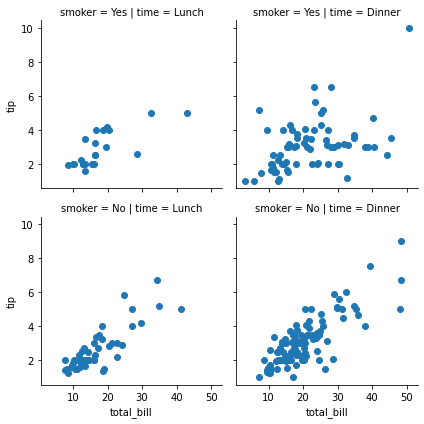

In [26]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

## *Part 4 Finished!*

Continue to >> [note part 5: Regression Plots](./05-seaborn-note-5.ipynb)